In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from demo_mnist import *
sess = tf.Session()

Using TensorFlow backend.


In [3]:
real_data = mnist_data()

noise_dimensions = [ 100 ]
real_dimensions = real_data.shape[1:]

noise_sampler = create_noise_sampler()
data_sampler = create_data_sampler(real_data, subset_size=20000)

In [4]:
gan = WGAN(
    Generator(input_shape=noise_dimensions, output_shape=real_dimensions),
    Discriminator()
)
gan.train_accumulate = create_accumulator(
    sample_nth=100,
    sess=sess,
    output_path='output/summaries/wgan'
)

In [5]:
gan.generate = lambda count: create_images_from_samples(sess.run(
    gan.G,
    feed_dict={gan.z: noise_sampler((count, *gan.generator.input_shape))}
).squeeze(axis=3))

Generating sample images...


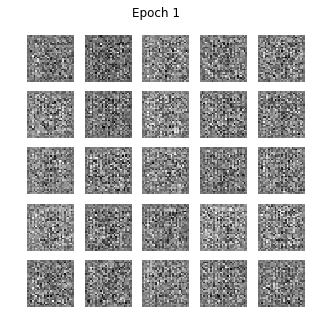

Epoch 1 losses G=0.172923 D=4.224710
Epoch 10 losses G=-143.594727 D=-265.299072
Epoch 20 losses G=-154.834351 D=-228.798126
Epoch 30 losses G=-145.420624 D=-230.102692
Epoch 40 losses G=-138.432983 D=-56.743805
Epoch 50 losses G=-131.558594 D=-185.530884
Epoch 60 losses G=-95.851929 D=-183.765717
Epoch 70 losses G=-108.346771 D=-112.855316
Epoch 80 losses G=-96.243744 D=-85.775131
Epoch 90 losses G=-167.032318 D=-207.241852
Generating sample images...


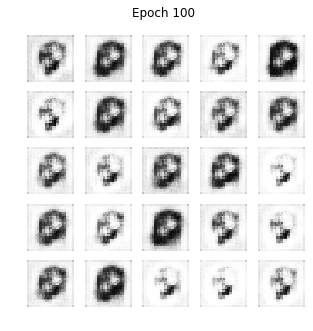

Epoch 100 losses G=-164.157257 D=-125.838745
Epoch 110 losses G=-118.525208 D=-22.663712
Epoch 120 losses G=-85.623169 D=-170.953918
Epoch 130 losses G=-79.370827 D=-125.187706
Epoch 140 losses G=-62.838310 D=-140.167526
Epoch 150 losses G=-74.730148 D=-128.501801
Epoch 160 losses G=-125.973999 D=-56.577667
Epoch 170 losses G=-106.310394 D=-124.862518
Epoch 180 losses G=-84.277832 D=-81.370758
Epoch 190 losses G=-87.617928 D=-81.924393
Generating sample images...


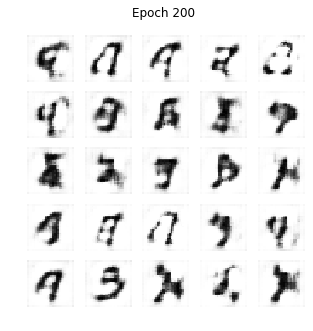

Epoch 200 losses G=-70.893127 D=-62.089233
Epoch 210 losses G=-46.690170 D=-76.291168
Epoch 220 losses G=-28.351141 D=-62.937283
Epoch 230 losses G=-60.845306 D=-64.131752
Epoch 240 losses G=-17.040573 D=-21.516258
Epoch 250 losses G=-15.307753 D=19.700142


In [6]:
gan.train(
    sess,
    data_sampler,
    noise_sampler,
    batch_size=128,
    n_epochs=3000,
    n_critic=5,
    n_accumulate=10
)

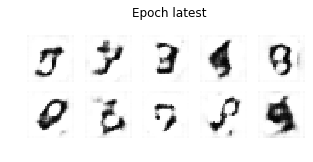

In [7]:
gan.generate(10)